 # **Estudio de inteligencia artificial**

Con la finalidad de llevar a cabo una fundamentacion completa desde cero, se realizara un cuadernillo de Python que buscar organizar el estudio desde cero enfocado en inteligenica artificial, ciencia de datos, procesamiento de datos y procesamiento de lenguaje natural. Se busca hacer un analisis explicativo desde tecnicas de regresion, tecnicas simples de machine learning, regresion logistica, neurona simple, deep learning, tranformer, todo esto hasta llegar a LLM.

Libros base para este estudio:

Libros base para este estudio:


*   Speech and Language Processing
   An Introduction to Natural Language Processing, Computational Linguistics, and Speech Recognition with Language Models (Daniel Jurafsky)
   * http://alvarestech.com/temp/deep/Deep%20Learning%20by%20Ian%20Goodfellow,%20Yoshua%20Bengio,%20Aaron%20Courville%20(z-lib.org).pdf
*   Pattern Recognition and Machine Learning (Christopher M. Bishop)
   * https://www.microsoft.com/en-us/research/wp-content/uploads/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf
*   Deep Learning (Ian Goodfellow)
   * http://alvarestech.com/temp/deep/Deep%20Learning%20by%20Ian%20Goodfellow,%20Yoshua%20Bengio,%20Aaron%20Courville%20(z-lib.org).pdf

In [128]:
### Librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

## Regresion lineal simple

### Explicacion de regresion lineal simple
Una regresion lineal simple es un modelo estadistico que busca predecir el valor de una variable dependiente (Y) a partir de una variable independiente (X) mediante una ecuacion lineal. La ecuacion general de la regresion lineal simple es la ecuacion de una recta, ya que la relacion entre las variables en un plano cartesiano podria ser vista como esta.

Y = b0 + b1 * X

Donde:
* Y es la variable dependiente (lo que queremos predecir).
* X es la variable independiente (la que usamos para predecir).
* b0 es la interseccion (el valor de Y cuando X es 0).
* b1 es la pendiente (el cambio en Y por cada unidad de cambio en X).
* La regresion lineal simple se utiliza para modelar relaciones lineales entre dos variables y se basa en la minimizacion de la suma de los errores al cuadrado (residuos) entre los valores observados y los valores predichos por el modelo.

Para encontras los valores de interseccion y pendiente de la recta se utilizan ecucciones que describen el comportamiento de los datos y ayudan a tener una mejor comprension de la de la relacion entre las variables:

Para hallar a a b1 que lo entendems como la pendiente de la recta necesitamos calcular, la media de X y la media de Y, media aritmetica es decir el promedio de los valores, posteriormente se multiplica el sumatorio de la desviacion de X por el sumatorio de la desviacion de Y, y lo divide entre el cuadado de la desviacion de X, es decir la suma de los cuadrados de las diferencias entre cada valor de X y la media de X. Asi obtenemos el valor de la pendinete b1 (mejorar esta definicion en el futuro).

Posteriormente para encontrar el intercepto b0, procedemos a usar la media de X y Y, para despejar la pendiente como se hace en un curso de matemticas simple, es decir, despejamos b0 de la ecuacion de la recta, y obtenemos el valor de b0 como la media de Y menos la pendiente por la media de X.

### Ejemplo de regresion lineal simple

In [129]:
#Generamos datos de ejemplo

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) #Años de experiencia
Y = np.array([15000, 18000, 21000, 24000, 27000, 30000, 33000, 36000, 39000, 42000]) #Salario en dolares

#Calculamos manualmente la bo y b1 manualmente entendiendo que
#b1 es la penmdiente de la rect y b0 es la interseccion

x_media = np.mean(X)
y_media = np.mean(Y)

b1 = np.sum((X-x_media) * (Y - y_media)) / np.sum((X - x_media) ** 2)

b0= y_media - b1 * x_media

print(f"el valor para la pendiente es: {b1}")
print(f"el valor para la interseccion es: {b0}")


el valor para la pendiente es: 3000.0
el valor para la interseccion es: 12000.0


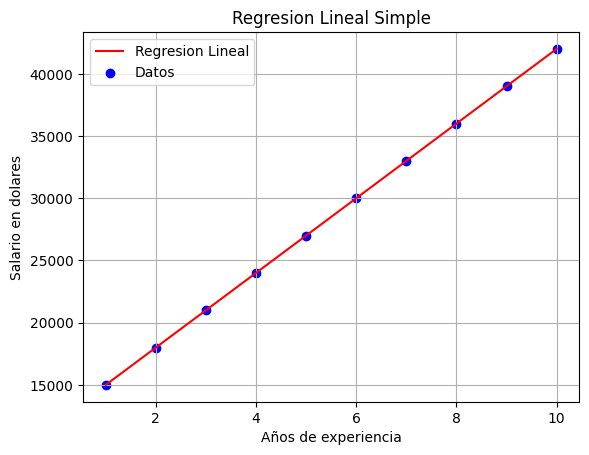

In [130]:
#Prediccion de Y
y_pred = b0 + b1 * X

#Graficamos lso datos y la recta de regresion
plt.plot(X, y_pred, color='red', label='Regresion Lineal')
plt.scatter(X, Y, color='blue', label='Datos')
plt.xlabel('Años de experiencia')
plt.ylabel('Salario en dolares')
plt.title('Regresion Lineal Simple')
plt.legend()
plt.grid()
plt.show()


### Facilidades de uso de librerias

El anterior modelo matematico se calculo manualmente, pero es mas sencillo utilizar librerias que que faciliten estos procesos, sin dejar a un lado que el entendimiento de los conceptos que yacen por debajo son importantisimos para la comprension de la tarea que se esta realizando.

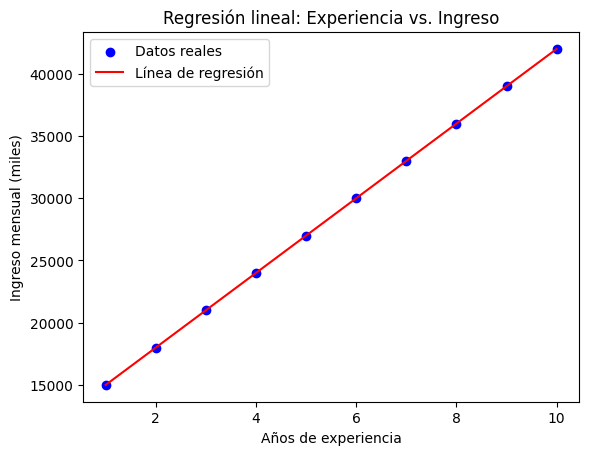

In [131]:
#Uso de librerias

model = LinearRegression()
X_1=X.reshape(-1,1)  # Reshape para que X tenga la forma correcta
model.fit(X_1,Y)

plt.scatter(X_1, Y, color='blue', label='Datos reales')
plt.plot(X_1, model.predict(X_1), color='red', label='Línea de regresión')
plt.xlabel('Años de experiencia')
plt.ylabel('Ingreso mensual (miles)')
plt.legend()
plt.title('Regresión lineal: Experiencia vs. Ingreso')
plt.show()

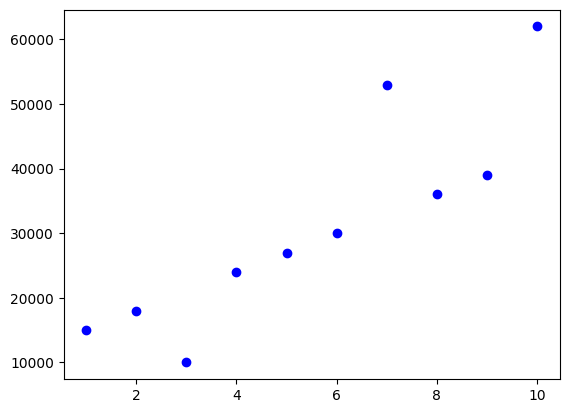

In [132]:
#Ahora supongamos que un par de datos se desalinean de la linea

X= np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) #Años de experiencia
Y = np.array([15000, 18000, 10000, 24000, 27000, 30000, 53000, 36000, 39000, 62000]) #Salario en dolares

#Graficamos los datos y la recta de regresion
plt.scatter(X, Y, color='blue', label='Datos')

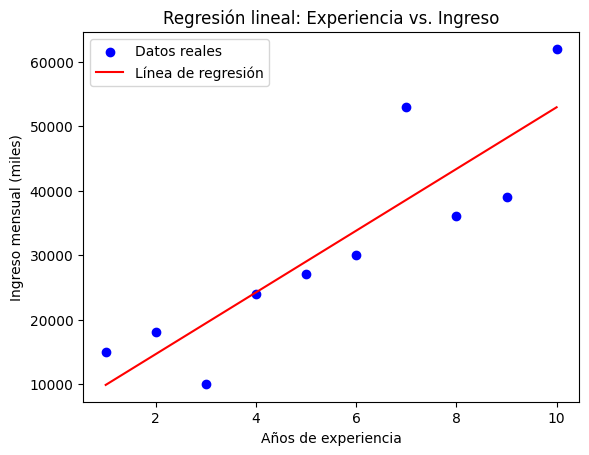

In [133]:
#Volvamos a entrenar el modelo con los nuevos datos
X_1=X.reshape(-1,1)  # Reshape para que X tenga la forma correcta

model= LinearRegression()
model.fit(X_1,Y)

plt.scatter(X_1, Y, color='blue', label='Datos reales')
plt.plot(X_1, model.predict(X_1), color='red', label='Línea de regresión')
plt.xlabel('Años de experiencia')
plt.ylabel('Ingreso mensual (miles)')
plt.legend()
plt.title('Regresión lineal: Experiencia vs. Ingreso')
plt.show()

### Analisis de los resultados

Miremos como una simple dispersion en los datos, los cuales no siguen una linea recta hacen al modelo lineal, perdeser completamentamente de sus capacidad de prediccion, esto es un problema que se conoce como **overfitting** o sobreajuste, donde el modelo se ajusta demasiado a los datos de entrenamiento y pierde su capacidad de generalizar a nuevos datos. Ademas de esto el problema que tratamos de solucionar no es lineal, lo cual hace que se aineficiente el uso de una regresion lineal simple, ya que no es capaz de capturar la complejidad de la relacion entre las variables. Ya que el principio de regresion lineal, ademas de que la relacion entre los datos sea lineal, es que los datos no tengan una dispersion alta, y su desviacion estandar sea baja, lo cual no es el caso de los datos que hemos generado. Por esa misma razon se hace necesario utilizar mdoelos mas complejos que puedan capturar la no linealidad de los datos y la dispersion de los mismos.

## Minimos cuadrados

### Contexto historico

Como se detallo en la seccion anterior, la regresion lineal simple, funciona siempre y cuando los datos sigan un comportamiento de linea reacta, y su dispersion no sea alta, esto debido a sus problemas de sobreajuste y linealidad de los datos, pero si no es asi, si el comportamiento de los datos no es lineal, tal vez pueda ser visto como una exponenial, como el crecimiento de un poblacion en sus inicios o  logaritmico, tal vez tenga maximos y minimos locales como en un polinomio, lo cual es un comportamiento que estamos mas acostumbrados a ver en la vida real, como acciones en la bolsa, valores de productos, etc. Para estos casos se necesita una herramienta mas robusta capaz de hacer una regresion mas compleja. Pero para entender esto hay que remitirnos a la historia.

EL dia de Año nuevo de 1801, desde Palermo Sicilia el astronomo italiano Giuseppe Piazzi descubrió el planeta enano Ceres. Este fue capaz de seguir su órbita durante 40 días, con las herramientas matematicas que poseia. Durante el curso de ese año, muchos científicos intentaron estimar su trayectoria con base en las observaciones de Piazzi (resolver las ecuaciones no lineales de Kepler de movimiento es muy difícil). La mayoría de las evaluaciones fueron inútiles o muy lejanas de la realida ; el único cálculo lo suficientemente preciso para permitirle observarlo a Franz Xaver von Zach, en Gotah, y un dia despues ser visto igualmente por Heinrich Olbers en Bremen, fue el desarrollado por uno de los mejores matematicos de toda la historia, Carl Fredierich Gauss, quien al escuchar del porblema lo resolvio en tan solo 3 meses y fue quien aviso donde se podria observar Ceres nuevamente. En ese momento Gauss era un joven de 24 años (los fundamentos de su enfoque ya los había planteado en 1795, cuando aún tenía 18 años).

A partir de las ecucaciones de Kepler, Gauss desarrollo un metodo para obtener una ecuacion de grado ochco, de la cual conocia una solucion y era la tratectoria de la orbita de la Tierra y apartir de ello desarrollo una metodologia que conoceriamos como el metodo de los minimos cuadrados. El cual incluye el conocimiento de teoria del error la solucion de un sistema lineal sobre determinado, el cual en el algebra lineal clasica se diria que no tiene solucion.

Es importante aclarar que el metodo no fue publicado hasta 1809, ya que Gauss no queria que se le atribuyera el descubrimiento de Ceres, ya que el mismo no lo descubrio, sino que fue un trabajo en conjunto de muchos cientificos, pero si fue el primero en resolver el problema de la orbita de Ceres. En el segundo volumen de su trabajo sobre mecánica celeste, Theoria Motus Corporum Coelestium in sectionibus conicis solem ambientium. Adrien-Marie Legendre desarrolló el mismo método de forma independiente en 1805, pero por linea de tiempo Gauss lo hizo primero, y por eso se le atribuye el descubrimiento del metodo de los minimos cuadrados.

### Definicion de minimos cuadrados

Para entender el metodo de los minimos cuiadrados hay que recordar un concepto clave del algebra lineal y es que una matriz solo es invertible si es cuadrada y su determinante es difernete de cero. En un sistema de ecuaciones ya que  puede ser visto de esta manera, solo es invertible si el numero de ecuaciones es igual al numero de incognitas, o visto de manera mas sencillas, si el numero de filas es igual al numero de columnas (en una matriz). En el caso de un sistema sobredeterminado, es decir, un sistema con mas ecuaciones que incognitas, esto no ocurre y porque tenemos mas escuaciones que incognitas, si volvemos al ejemplo de Ceres, se tenian 40 coordenada, es decir 40 ecuaciones y solo 2 incognitas independiente del sistema de coordenadas que estemos usando, ya sea el ecuatoria o el altazimutal, por lo cual no se puede resolver el sistema de ecuaciones, ya que no hay una unica solucion, y por lo tanto no se puede invertir la matriz del sistema.

¿Como se invierte una matriz que no es invertible? La respuesta es que no se puede, pero si se puede aproximar una solucion, y esto es lo que hace el metodo de los minimos cuadrados, el cual busca minimizar la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo. Es decir, busca encontrar la mejor aproximacion a la solucion del sistema de ecuaciones, minimizando el error cuadratico medio. Esta solucion se obtiene mediante un metodo denominado como la Pseudoinversa de Moore-Penrose, que permite encontrar una solucion aproximada a un sistema sobredeterminado.

Supongamos algo y es que tenemos los siguientes puntos a predecir:

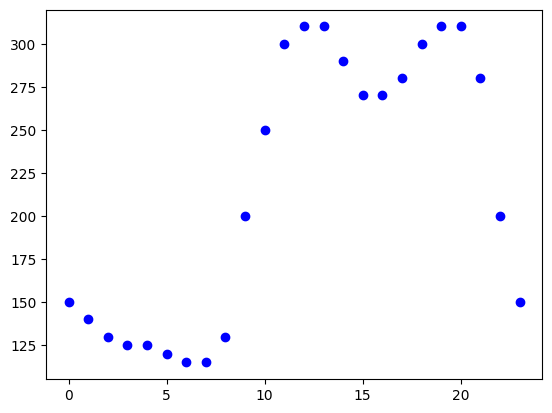

In [134]:
#Puntos a predecir

Altitud = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
Azimut = np.array([150, 140, 130, 125, 125, 120, 115, 115, 130, 200, 250, 300, 310, 310, 290, 270, 270, 280, 300, 310, 310, 280, 200, 150])

#Graficamos los puntos
plt.scatter(Altitud, Azimut, color='blue', label='Datos')

Si se quiere solucionar el sistema de manera lineal. La solucion no tendria sentido de que fuera lineal, ya que los puntos no siguen una linea recta, lo que aumentaria la incertidumbre del modelo a la hora de hacer una rediccion, por lo cual se hace necesario utilizar el metodo de los minimos cuadrados para encontrar la mejor aproximacion a la solucion del sistema de ecuaciones. Es notorio como se debe aproximar la solcion con un plonimonio, por lo menos de grado 5, dados los los dos maximos locales y los dos miniomos locales.

La el primer concepoto para poder aplicvar el metodo de los minimos cuadrado es el conceptro de linealmentre separable, como por ejemplo en un polinomio (supongamoslo de grado 3).

$\beta_0 x + \beta_1 x^2 + \beta_2 x^3 = y$

 Olvidemos que los valores de x, y son incognitas y veamoslo como valores concidos, como en el ejemplo de Ceres, las dos coordenadas se concocen durante 40 dia, es dsecir que puedo separa linealmente valores para $\beta_0$, $\beta_1$ y $\beta_2$, que me permitan calcular el polinomio que mejor se ajusta al modelo.



## ¿Qué significa que una función sea *lineal en los parámetros*?

En aprendizaje automático y estadística, una función es **lineal en los parámetros** si se puede escribir como una combinación lineal de funciones conocidas de la variable independiente \( x \), multiplicadas por coeficientes (los parámetros \( \beta_i \)).

La forma general es:

$y = \beta_0 f_0(x) + \beta_1 f_1(x) + \dots + \beta_n f_n(x)$

donde:

- ($f_i(x)$) son funciones conocidas de la variable $(x)$
- ($\beta_i$) son los parámetros (incógnitas)

---

## Ejemplo

La siguiente expresión:

$y = \beta_0 x + \beta_1 x^2 + \beta_2 x^3$

es **no lineal en \( x \)**, pero **sí es lineal en los parámetros** \( \beta_0, \beta_1, \beta_2 \), porque puede reescribirse como:

$y = \beta_0 f_0(x) + \beta_1 f_1(x) + \beta_2 f_2(x)$

con:

- $( f_0(x) = x )$
- $( f_1(x) = x^2)$
- $( f_2(x) = x^3)$

---

## ¿Qué la hace *lineal*?

- Cada parámetro $( \beta_i )$ multiplica directamente una función de $( x )$.
- No hay productos entre parámetros, como $( \beta_1 \cdot \beta_2 )$.
- No hay funciones no lineales de los parámetros, como $( \sin(\beta_1 x) )$ o $( \beta_2^x )$.

---

## Ejemplos **no lineales en los parámetros**

Estas expresiones **no son lineales en los parámetros**:

$y = \beta_1^2 x + \beta_2$

$y = \sin(\beta_1 x)$

$y = \beta_0 x + \beta_1 x^{\beta_2}$

En todos estos casos, los parámetros aparecen de forma no lineal (cuadrados, dentro de una función no lineal, en exponentes, etc.).

---

## Conclusión

Una función es **lineal en los parámetros** (también llamada **linealmente separable**) si se puede expresar como:

$y = \sum_{i=0}^n \beta_i f_i(x)$

Esto permite usar modelos como regresión lineal, aunque las funciones \( f_i(x) \) no sean lineales en \( x \).


### Representacion matricial

Supongamos que tenemos un conjunto de datos con \( n \) observaciones y queremos ajustar un modelo polinómico de grado 3. Podemos representar el sistema de ecuaciones lineales en forma matricial como:

$ \begin{bmatrix}
\beta_0 x_1 & \beta_1 {x_1}^2 & \beta_2 {x_1}^3\\
\beta_0 x_2 & \beta_1 {x_2}^2 & \beta_2 {x_2}^3\\
\beta_0 {x_3} & \beta_1 {x_3}^2 & \beta_2 {x_3}^3\\
... & ... & ... \\
\beta_0 x_n & \beta_1 {x_n}^2 & \beta_2 {x_n}^3
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
... \\
y_n
\end{bmatrix}
$

Si observamos los valores de ( $\beta_0$, $\beta_1$, $\beta_2$ ) son constantes, si se toman como incognitas ya que los valores de ( $x$ ) y ( $y$ ) son conocidos, existiran unos valores para ( $\beta_0$, $\beta_1$, $\beta_2$ ) que minimizan la suma de los cuadrados de las diferencias entre los valores observados y los valores predichos por el modelo. Aun sabiendo que el sistema es sobredeterminado, la respuesta es si, mediante el metodo de los minimos ccuadrados.

# Método de los Mínimos Cuadrados (Gauss)

Queremos resolver el sistema sobredeterminado:

  $A * \mathbf{x} ≈ b$

Buscamos el vector x que minimiza el error cuadrático:

  $min_x || A * \mathbf{x} - b ||^2$

Derivamos la función:

  $f(x) = (A*\mathbf{x} - b)^T (A*x - b)$

Calculamos el gradiente y lo igualamos a cero:

  $∇f(x) = 2 * A^T * A * \mathbf{x} - 2 * A^T * b = 0$

Obtenemos la ecuación normal:

  $A^T * A * \mathbf{x}= A^T * b$

Y si A^T A es invertible, entonces:

  $\hat{\mathbf{x}} = (A^T * A)^{(-1)} * A^T * b$


## Pseudoinversa de Moore-Penrose

Como la solucion no es unica $\mathbf{x}$ pasa a se una aproximacion, se denota como $\hat{\mathbf{x}}$ y a la solucion que llegamos antes $(A^T * A)^{(-1)} * A^T$, se le conoce como la pseudoinversa de Moore-Penrose, denotada como $A^+$ o $A^{\dagger}$.

La **pseudoinversa de Moore-Penrose** es uno de los tipos más conocidos de pseudoinversas de matrices. Fue descrita de manera independiente por varios matemáticos a lo largo de la historia. En 1920, **E. H. Moore** introdujo el concepto, seguido por **Arne Bjerhammar** en 1951 y **Roger Penrose** en 1955. Sin embargo, el concepto de pseudoinversa se remonta incluso más atrás, cuando **Fredholm** en 1903 propuso el concepto de pseudoinversa para operadores integrales.

El término **pseudoinversa** de una matriz generalmente hace referencia a la **pseudoinversa de Moore-Penrose**, que ha sido fundamental en muchas aplicaciones matemáticas y científicas. Es importante señalar que, en sus inicios, este concepto se desarrolló con contribuciones que, aunque no estaban unificadas, se pueden ver como una extensión de las ideas de la teoría de matrices de **Carl Friedrich Gauss**, quien realizó importantes avances en la resolución de sistemas de ecuaciones lineales en el siglo XIX.

La **pseudoinversa de Moore-Penrose** es especialmente útil para resolver sistemas de ecuaciones lineales que no tienen una solución única o son sobredeterminados. Un uso común de la pseudoinversa es calcular una **solución de ajuste óptimo** a través del método de los **mínimos cuadrados**. Este método se emplea cuando el sistema de ecuaciones tiene más ecuaciones que incógnitas y no se puede encontrar una solución exacta.

Otro uso importante es encontrar la **solución de norma mínima (Euclidiana)** en casos de sistemas con múltiples soluciones. La pseudoinversa proporciona una forma sencilla de encontrar la solución más "cercana" en el sentido de la distancia Euclidiana, minimizando el error en sistemas sobredeterminados.



### Analicemos la soluicion

Como se expreso se hace necesario que la suposicion de la solucion sea linealmnente separable, para poder ser expresado de manera matricial y asi poder aplicar el metodo de los minimos cuadrados, utilizando la Pseudoinversa de Moore-Penrose. haciendo la separacion lineal y tulizando las betas como incgnitas, la solucion al sistema en notacion matricial seria la siguiente:


$$
\begin{bmatrix}
x_1 & x_1^2 & x_1^3 \\
x_2 & x_2^2 & x_2^3 \\
x_3 & x_3^2 & x_3^3 \\
\vdots & \vdots & \vdots \\
x_n & x_n^2 & x_n^3
\end{bmatrix}
\cdot
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_n
\end{bmatrix}
$$

`
La ecuacion matricial es de la forma $A * \mathbf{x} = b$, donde:
- $( A )$ es la matriz de diseño, que contiene las variables independientes (en este caso, $( x )$, $( x^2 )$ y $( x^3 )$).
-  $( \hat{\mathbf{x}} )$ es el vector de parámetros (los $( \beta_i )$).
- $( b )$ es el vector de observaciones (los $(y_i)$).

Para resolver el sistema, aplicamos la pseudoinversa de Moore-Penrose:

$ \hat{\mathbf{x}} = (A^T * A)^{-1} * A^T * b$

O reducimos:
$ \hat{\mathbf{x}} = A^+ * b$

In [135]:
# Aplicamento del metodo de los minimos a pedal para entender la forma de aplicacion.

fila_0 =Altitud**0
fila_1= Altitud
fila_2= Altitud**2
fila_3 = Altitud**3
fila_4 = Altitud**4
fila_5 = Altitud**5
fila_6 = Altitud**6
fila_7 = Altitud**7
fila_8 = Altitud**8

A = np.array([fila_8, fila_7, fila_6, fila_5, fila_4, fila_3, fila_2,fila_1,fila_0]).T # Transponemos para que las filas sean las observaciones


# La construccion de la matriz A se puede resumir en una funcion que me indique el grado de la funcion polinomial a suponer y construlla la matriz

def build_matrix(altitudes, degree):
    """
    Construye una matriz de diseño para un polinomio de grado dado, con los grados
    ordenados de mayor a menor.

    :param altitudes: Array de altitudes (X).
    :param degree: Grado del polinomio.
    :return: Matriz de diseño.
    """
    return np.array([altitudes**(degree - i) for i in range(degree + 1)]).T




print("La matriz A del problema es la siguiente")
print(A.shape)

print("La matriz A del problema con la funcion de construccion es la siguiente")
print( (build_matrix(Altitud, 8)).shape)  # Cambia el grado según sea necesario

b = Azimut.T

# Calculamos la pseudoinversa de Moore-Penrose a pedal
A_pseudo = (np.linalg.inv((A.T).dot(A)).dot(A.T))
#Para estos problemas exiten libreias que ya incluyen la Pseudo-Inversa implementada
A_pseudo_dos = np.linalg.pinv(A)

print("La Pseudo-Inversa de Moore Penrouse a pedal")
print(A_pseudo.shape)
print("La Pseudo-Inversa de Moore Penrouse de numpy")
print(A_pseudo_dos.shape)


La matriz A del problema es la siguiente
(24, 9)
La matriz A del problema con la funcion de construccion es la siguiente
(24, 9)
La Pseudo-Inversa de Moore Penrouse a pedal
(9, 24)
La Pseudo-Inversa de Moore Penrouse de numpy
(9, 24)


In [136]:
#Calculamos lo betas para obtener le polinomio de grado 11
# Verifica las dimensiones de las matrices
print(f"Dimensiones de A_pseudo_dos: {A_pseudo_dos.shape}")
print(f"Dimensiones de b: {b.shape}")

A_pseudo_dos=np.linalg.pinv(build_matrix(Altitud, 10)) # Cambia el grado según sea necesario
solucion=A_pseudo_dos.dot(b)
print("Los coeficientes para el polinomio de grado 1")
print(solucion)

Dimensiones de A_pseudo_dos: (9, 24)
Dimensiones de b: (24,)
Los coeficientes para el polinomio de grado 1
[-1.13550496e-07  1.34225371e-05 -6.66524317e-04  1.80339205e-02
 -2.88456222e-01  2.77114412e+00 -1.55811871e+01  4.80254828e+01
 -6.99870466e+01  2.50811993e+01  1.50117075e+02]


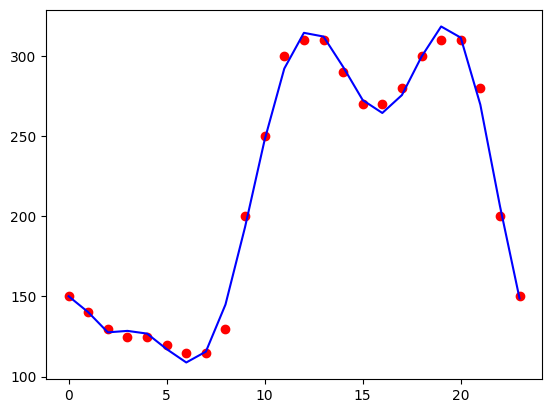

In [137]:

def evaluar_polinomio(coeficientes, x_values):
    # Inicializamos el vector de resultados
    y_values = np.zeros_like(x_values, dtype=float)

    # Para cada valor de x, evaluamos el polinomio
    for i, x in enumerate(x_values):
        # Evaluamos el polinomio para este valor de x
        y_values[i] = 0
        for j, c in enumerate(coeficientes):
            exponente = len(coeficientes) - 1 - j
            y_values[i] += c * (x ** exponente)

    return y_values

predicciones= evaluar_polinomio(solucion,Altitud)
plt.plot(Altitud, predicciones, color='blue', label='Datos')
plt.scatter(Altitud, Azimut, color='red', label='Datos Reales')

Coeficientes del modelo: [ 0.00000000e+00  9.70093535e-03  3.30777685e-02  7.54092122e-02
  6.65581284e-02 -1.60582868e-01  5.36819940e-02 -7.70551312e-03
  5.83763356e-04 -2.44873044e-05  5.39263971e-07 -4.87658196e-09]
Intercepto: 139.70471107251555


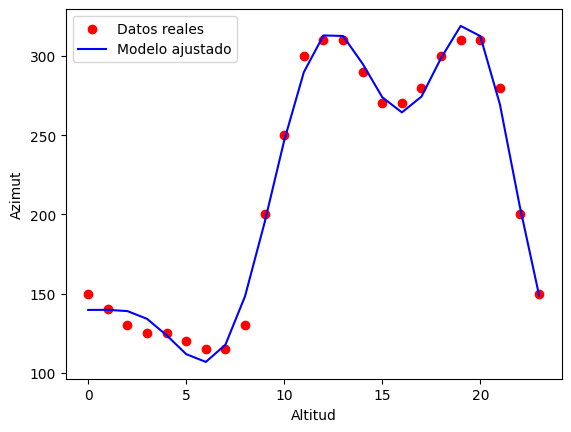

In [138]:

Altitud_2= Altitud.reshape(-1, 1)  # Reshape para que Altitud tenga la forma correcta
# Transformamos los datos a características polinómicas de grado 8
poly = PolynomialFeatures(degree=11)
X_poly = poly.fit_transform(Altitud_2)

# Creamos y ajustamos el modelo de regresión lineal
model = LinearRegression()
model.fit(X_poly, Azimut)

# Coeficientes obtenidos
print("Coeficientes del modelo:", model.coef_)
print("Intercepto:", model.intercept_)

# Predicciones
predicciones = model.predict(X_poly)

# Graficamos los resultados
plt.scatter(Altitud_2, Azimut, color='red', label='Datos reales')
plt.plot(Altitud_2, predicciones, color='blue', label='Modelo ajustado')
plt.xlabel('Altitud')
plt.ylabel('Azimut')
plt.legend()
plt.show()